# Úloha predikce poskytnutí úvěru bankovním klientům

Cílem práce je sestavení různých modelů metod ML pro účely predikce poskytnutí bankovního
úvěru klientům.

Pro tento účel je použit dataset obsahující údaje o bankovních klientech ve vztahu ke skutečnosti,
zda jim byl poskytnut úvěr či nikoli. Data pocházejí z
https://www.kaggle.com/sriharipramod/bank-loan-classification.

## Načtení a prvotní seznámení s daty
V rámci této fáze projektu dochází k načtení výchozích dat a prvotnímu seznámení s daty.

Import základních knihoven a funkcí:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Načtení výchozích dat:

In [12]:
source_path = '../data/UniversalBank.csv'
data = pd.read_csv(source_path)

### Základní porozumění datasetu
Dimenze vstupní matice dat:

In [13]:
print(data.shape)

(5000, 14)


Datové typy atributů:

In [14]:
print(data.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


Zobrazení prvních 5 řádků:

In [15]:
print(data.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


Zobrazení posledních 5 řádků:

In [16]:
print(data.tail())

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           

Názvy atributů:

In [17]:
print(data.columns.tolist())

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


Základní statistické charakteristiky atributů:

In [18]:
print(data.describe())

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

Skutečnost, zda dataset obsahuje chybějící hodnoty:

In [19]:
print(data.isnull().values.any())

False


Počet chybějících hodnot v datasetu:

In [20]:
print(data.isnull().sum().sum())

0


Počet chybějících hodnot podle atributů:

In [21]:
print(data.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


## Vizualizace a předzpracování
Nyní dochází k vizualizaci dat a k jejich předzpracování.

Uprava názvu nekterých atributů:

In [22]:
data = data.rename(columns={'ZIP Code': 'ZIP_Code',
                            'Personal Loan': 'Personal_Loan',
                            'Securities Account': 'Securities_Account',
                            'CD Account': 'CD_Account'})

Odstranění z hlediska úlohy bezvýznamných atributů:

In [23]:
data = data.drop(columns=['ID', 'ZIP_Code'])

Dichotomizace kategoriálních atributů:

In [24]:
data = pd.get_dummies(data, columns=['Family', 'Education'], drop_first=True)

Histogramy jednotlivých atributů podmíněné cílovým atributem *Personal_Loan*:

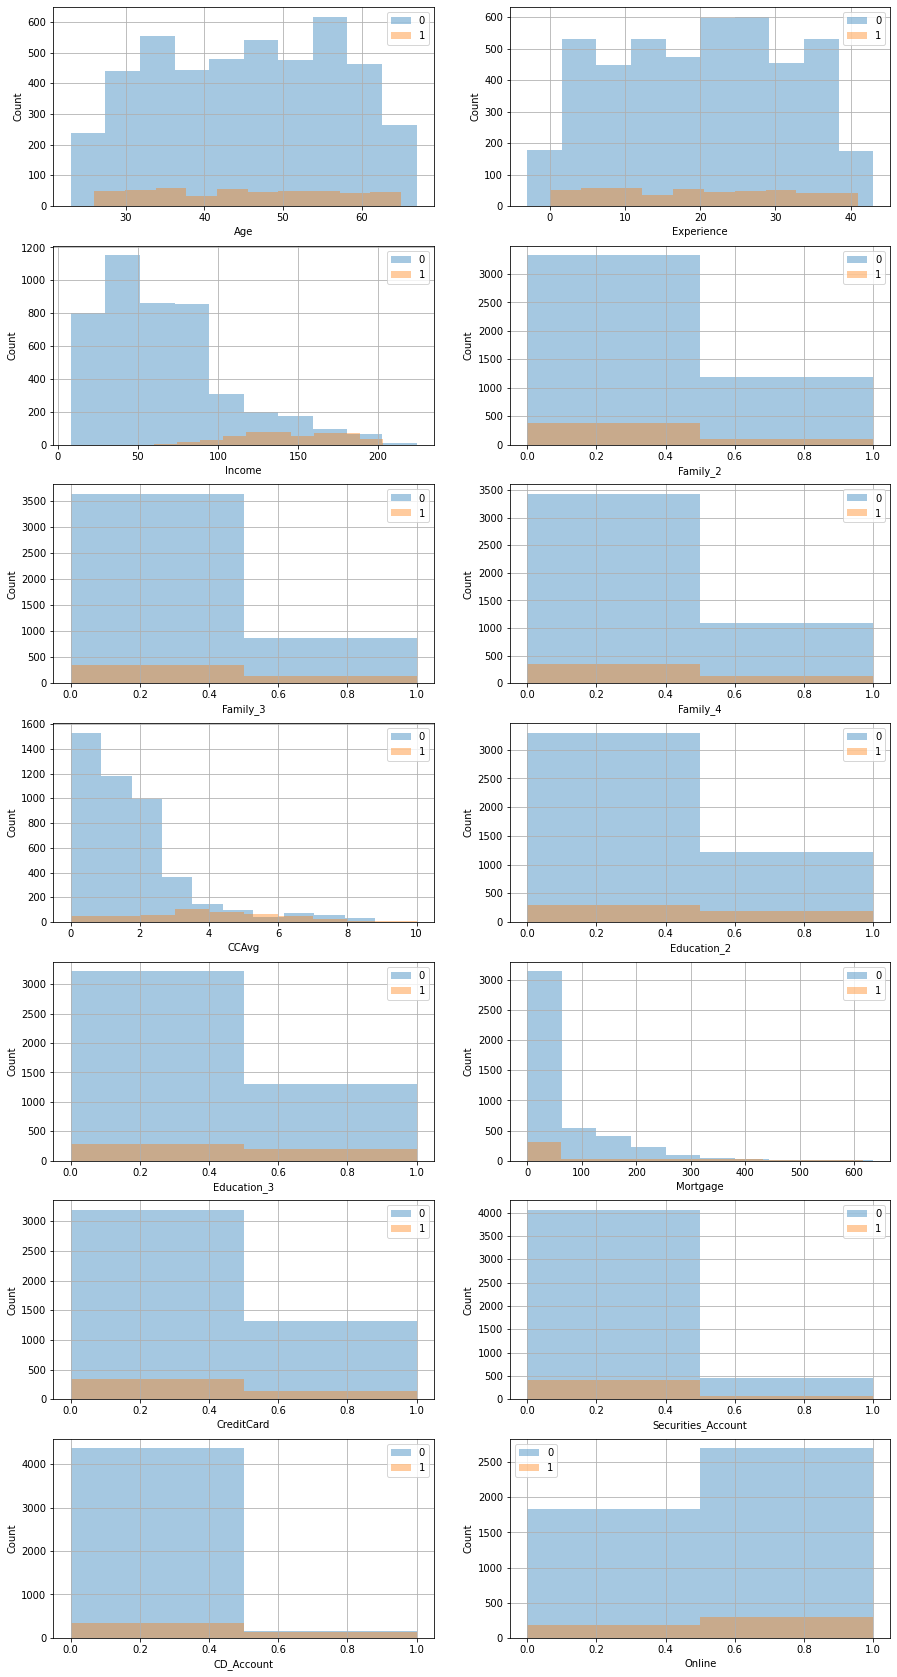

In [25]:
fig, axs = plt.subplots(nrows=7, ncols=2)

data.groupby('Personal_Loan').Age.hist(bins=10, figsize=(15, 30), alpha=0.4, ax=axs[0, 0], legend=True)
axs[0, 0].set(xlabel='Age', ylabel='Count')
data.groupby('Personal_Loan').Experience.hist(bins=10, figsize=(15, 30), alpha=0.4, ax=axs[0, 1], legend=True)
axs[0, 1].set(xlabel='Experience', ylabel='Count')
data.groupby('Personal_Loan').Income.hist(bins=10, figsize=(15, 30), alpha=0.4, ax=axs[1, 0], legend=True)
axs[1, 0].set(xlabel='Income', ylabel='Count')
data.groupby('Personal_Loan').Family_2.hist(bins=2, figsize=(15, 30), alpha=0.4, ax=axs[1, 1], legend=True)
axs[1, 1].set(xlabel='Family_2', ylabel='Count')
data.groupby('Personal_Loan').Family_3.hist(bins=2, figsize=(15, 30), alpha=0.4, ax=axs[2, 0], legend=True)
axs[2, 0].set(xlabel='Family_3', ylabel='Count')
data.groupby('Personal_Loan').Family_4.hist(bins=2, figsize=(15, 30), alpha=0.4, ax=axs[2, 1], legend=True)
axs[2, 1].set(xlabel='Family_4', ylabel='Count')
data.groupby('Personal_Loan').CCAvg.hist(bins=10, figsize=(15, 30), alpha=0.4, ax=axs[3, 0], legend=True)
axs[3, 0].set(xlabel='CCAvg', ylabel='Count')
data.groupby('Personal_Loan').Education_2.hist(bins=2, figsize=(15, 30), alpha=0.4, ax=axs[3, 1], legend=True)
axs[3, 1].set(xlabel='Education_2', ylabel='Count')
data.groupby('Personal_Loan').Education_3.hist(bins=2, figsize=(15, 30), alpha=0.4, ax=axs[4, 0], legend=True)
axs[4, 0].set(xlabel='Education_3', ylabel='Count')
data.groupby('Personal_Loan').Mortgage.hist(bins=10, figsize=(15, 30), alpha=0.4, ax=axs[4, 1], legend=True)
axs[4, 1].set(xlabel='Mortgage', ylabel='Count')
data.groupby('Personal_Loan').CreditCard.hist(bins=2, figsize=(15, 30), alpha=0.4, ax=axs[5, 0], legend=True)
axs[5, 0].set(xlabel='CreditCard', ylabel='Count')
data.groupby('Personal_Loan').Securities_Account.hist(bins=2, figsize=(15, 30), alpha=0.4, ax=axs[5, 1], legend=True)
axs[5, 1].set(xlabel='Securities_Account', ylabel='Count')
data.groupby('Personal_Loan').CD_Account.hist(bins=2, figsize=(15, 30), alpha=0.4, ax=axs[6, 0], legend=True)
axs[6, 0].set(xlabel='CD_Account', ylabel='Count')
data.groupby('Personal_Loan').Online.hist(bins=2, figsize=(15, 30), alpha=0.4, ax=axs[6, 1], legend=True, )
axs[6, 1].set(xlabel='Online', ylabel='Count')

plt.show()

Histogram cílového atributu *Personal_Loan*:

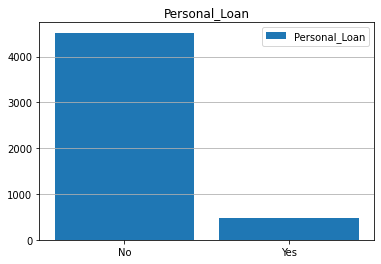

In [26]:
data.hist(column = 'Personal_Loan', bins=2, legend=True, rwidth=0.85)
plt.grid(axis='x')
plt.xticks((0.25,0.75), ('No', 'Yes'))
plt.show()


Počet záznamů v datasetu s hodnotou cílového atributu rovno 0, resp. Ne:

In [27]:
print(sum(data['Personal_Loan'] == 0))

4520


Počet záznamů v datasetu s hodnotou cílového atributu rovno 1, resp. Ano:

In [28]:
print(sum(data['Personal_Loan'] == 1))

480


Z výše uvedených výstupů je patrné, že dataset je z hlediska cílového atributu
nevyrovnaný.

Korelační matice atributů:

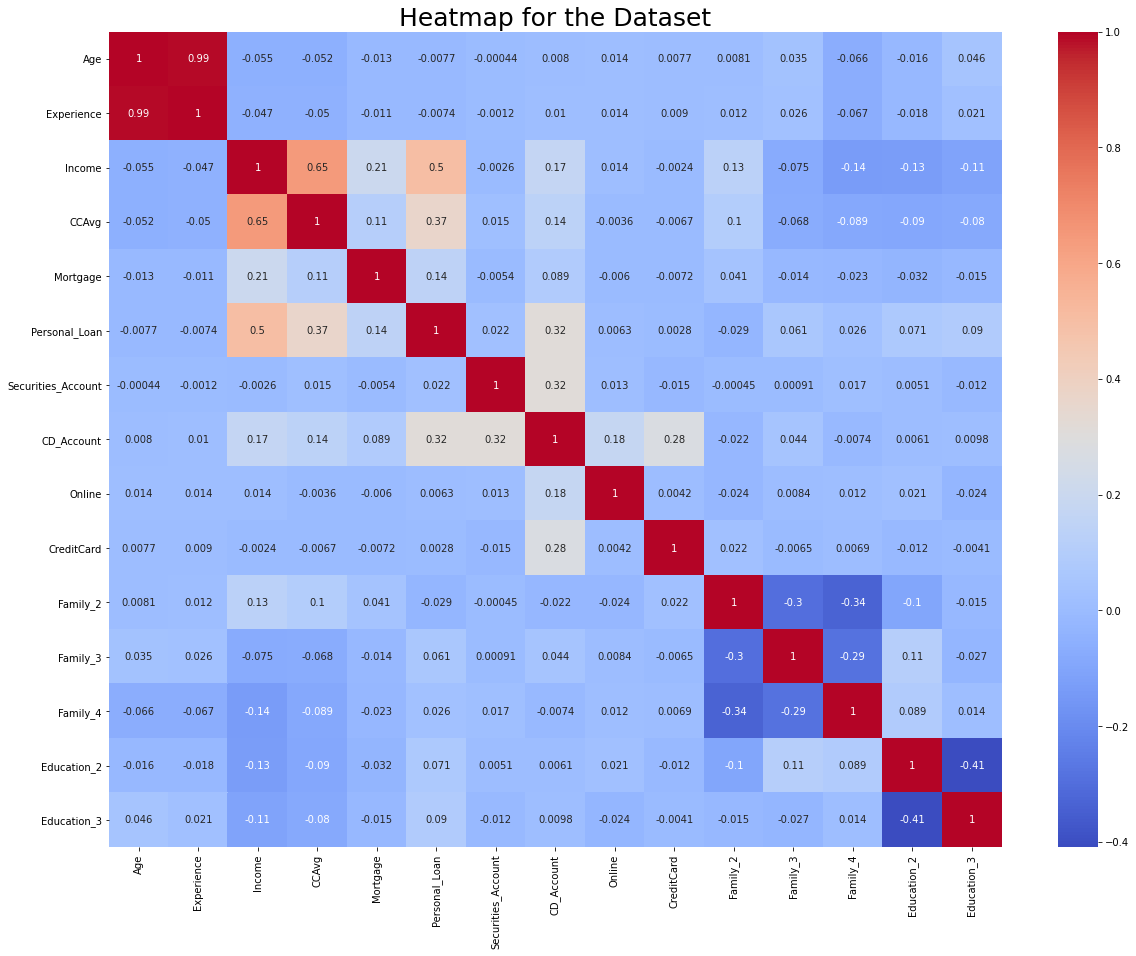

In [29]:
corr_matrix = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Heatmap for the Dataset', fontsize = 25)

plt.show()

Z výše uvedeného výstupu vyplývá cílový atribut je nejvíce korelován s
atributy *Income*, *CCAvg* a *CD_Account*.

Dále je patrné, že mezi aributy *Experience* *Age* je téměř perfektní korelace.
Data jsou tedy zatížena perfektní multikolinearitou, kterou odstraníme tím,
že jednu z těchto proměnných vynecháme. Jměnovitě vynecháme proměnnou *Experience*.

V případě neošetření perfektní multikolinearity v datech by byly negativně
ovlivněny modely ve fázi trénování.

Vynechání atributu *Experience*:

In [30]:
data = data.drop(columns='Experience')

Nakonec předzpracovaný dataset uložíme jako csv soubor.

In [31]:
data_path = './../data/UniversalBank_Final.csv'
data.to_csv(data_path, index=False)

## Modelování
V této části dochází k vytvoření modelů následujících metod strojového učení:

- Logistická regrese,
- Random forest.

V rámci každé metody je vytvořen model, který je je optimalizován z hlediska hodnot vybraných hyperparametrů.

### Logistická regrese
Import knihoven a funkcí potřebných pro modelování:

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

Oddělení cílového atributu od ostatních atributů:

In [33]:
y = data['Personal_Loan']
X = data.drop(columns=['Personal_Loan'])

Rozdělení datasetu na trénovací a testovací část v poměru 80:20.
Pro zachování stejného podílu hodnot cílového atributu v obou částech datasetu je použit
volitený argumment *stratify*:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

Dochází k vytvoření objektu Pipeline a definovanými kroky.
V rámci kroku *preprocessing* je na 4 spojité numerické atributy aplikován *StandardScaler*.
Výsledkem jsou transformované atributy, jejichž hodnoty jsou normalizované a nachází se tedy na stejně dlouhém intervalu.
Klasické metody strojového učení včetně logistické regrese obecně lépe pracují s normalizovanými hodnotami spojitých
atributů.

V druhém kroku je pro klasifikační účely použita metoda logistické regrese.

In [35]:
num_atributes = ['Age', 'Income', 'CCAvg', 'Mortgage']

preprocessing_step = ColumnTransformer([
    ('num', StandardScaler(), num_atributes)
], remainder='passthrough')

steps = [('preprocessing', preprocessing_step),
         ('classifier', LogisticRegression())]

pipeline = Pipeline(steps)

Specifikovaný objekt pipeline je následně obalený objektem GridSearchCV, který v rámci vykonávání kroků pipeline aplikuje
v kroku classifier hledání optimální kombinace hyperparamentů modelu logistické regrese.

In [36]:
params_space = {
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

gs_logit = GridSearchCV(estimator=pipeline,
                        param_grid=params_space,
                        scoring='neg_root_mean_squared_error',
                        cv=10,
                        verbose=0)

Nyní zavoláme na objektu GridSearchCV funkci fit s trénovacími daty jako argumentem.
Ta spustí jednotlivé kroky objektu Pipeline s hledáním optimální kombinace hyperparametrů u logistické regrese.
Prohledávání prostoru hyperparametrů probíhá v rámci 10 násobné crossvalidace na trénovacích datech.
Výsledkem je získání takové kombinace hyperparametrů, v rámci které model LR při crossvalidaci na trénovacích datech dosahuje nejnižší absolutní
hodnoty RMSE.

In [37]:
gs_logit.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Income',
                                                                          'CCAvg',
                                                                          'Mortgage'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                             

Zobrazení score pro jednotlivé modely LR používající různé kombinace hyperparametrů:

In [ ]:
for i in range(len(gs_logit.cv_results_['params'])):
    print(gs_logit.cv_results_['params'][i], 'test RMSE:', gs_logit.cv_results_['mean_test_score'][i])

Optimální nastavení hyperparametrů logistické regrese:

In [38]:
print(gs_logit.best_estimator_)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('classifier', LogisticRegression(C=10.0, solver='liblinear'))])


Nyní se v hyperparametrech optimální model LR použije pro predikci na testovacím datasetu. V rámci metody predict
dochází k aplikování jednotlivých kroků objektu Pipeline, tj. k transformaci numerických spojitých proměnných testovacího
dataseutu a k samotné predikci:

In [39]:
y_pred_lr = gs_logit.best_estimator_.predict(X_test)

Natrénovaný model LR umožňuje predikovat pravděpodobnost příslušnosti testovacích záznamů k jednotlivým třídám
cílového atributu:

In [40]:
y_proba_lr = gs_logit.best_estimator_.predict_proba(X_test)
y_proba_positive_lr = y_proba_lr[:, 1]

Celková správnost predikce/klasifikace na testovacím datasetu:

In [41]:
acc_score_lr = accuracy_score(y_test, y_pred_lr)
print(acc_score_lr)

0.952


Celková správnost klasifikace na trénovacích datech dosahuje hodnoty 0.952. Model správně klasifikoval 95 % testovacích
dat.

Celková správnost klasifikace není jedinou metrikou pro zhodnocení predikčních schopností modelu.
Kompletní zhodnocení schopností modelu je k dispozici níže:

In [42]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000



Kromě klasického vyhodnocení pomocí výše uvedených metrik je možné u  použít i evaluaci založenou na komplexnějších
metrikách reprezentovaných křivkou. Jmenovitě jsou použity následjící komplexnější metriky:

- ROC křivka,
- křivka kumulativních zisků.

ROC krivka dává v souvislost TP poměr a a FP poměr. Čím je se průběh křivky blíží levému hornímu rohu, tím je
vyšší poměr TP (podíl správně klasifikovaných pozitivních případů na všech pozitivních případech)
vázán s nižším FP poměrem (podíl špatně klasifikovaných negativních případů na všech negativních případech):

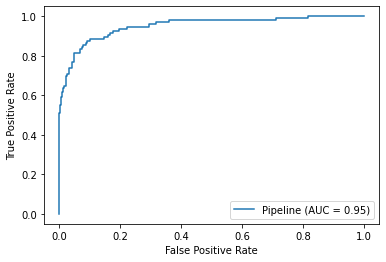

In [79]:
plot_roc_curve(gs_logit.best_estimator_, X_test, y_test)
plt.show()

Křivka kumulativních zisků dává v souvislost procento případů s modelem predikovanou nejvyšší pravděpodobností
a procento všech případů dané třídy.

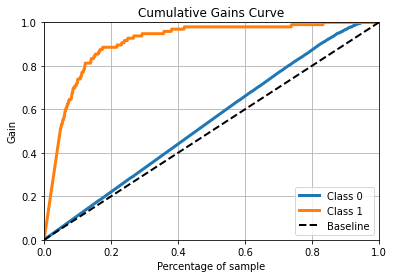

In [44]:
skplt.metrics.plot_cumulative_gain(y_test, y_proba_lr)
plt.show()

Z grafu lze vyčíst, že pokud vezmeme 20 procent případů, kterým model predikoval nejvyšší pravděpodobnost úspěchu, tak
v tého množině se nachází přibližně 90 procent všech pozitivních případů.

### Random forest
Import knihoven a funkcí potřebných pro modelování:


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


Definice objektu Pipeline s dvěma kroky. Oproti předchozímu modelování je v kroku *classifier* použit místo LR Random
Forest.

In [67]:
num_atributes = ['Age', 'Income', 'CCAvg', 'Mortgage']

preprocessing_step = ColumnTransformer([
    ('num', StandardScaler(), num_atributes)
], remainder='passthrough')

steps = [('preprocessing', preprocessing_step),
         ('classifier', RandomForestClassifier(random_state=1))]

pipeline = Pipeline(steps)

Stejně jako v předchozím případě i zde dochází k hledání optimálního modelu RF z hlediska definovaných hyperparametrů, a
to pomocí GridSearchCV.

In [68]:
params_space = {
    'classifier__max_depth': [None, 3, 6, 9],
    'classifier__criterion': ['gini', 'entropy']
}

gs_rf = GridSearchCV(estimator=pipeline,
                        param_grid=params_space,
                        scoring='accuracy',
                        cv=10,
                        verbose=0)


V rámci metody fit na trénovacích datech jsou stejně jako v předhozím příkladě aplikovány jednotlivé kroky Pipeline. Jediným
rozdílem je to, že GridSearchCV ohodnocuje jednotlivé modelů RF v rámci crossvalidace pomocí metriky celkové správnosti
predikce.  
Výsledkem je získání optimálního modelu RF z hlediska hyperparametrů.

In [69]:
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Income',
                                                                          'CCAvg',
                                                                          'Mortgage'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=1))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 3, 6, 9]},
             scoring='accuracy')

Zobrazení score pro jednotlivé modely RF používající různé kombinace hyperparametrů:

In [70]:
for i in range(len(gs_rf.cv_results_['params'])):
    print(gs_rf.cv_results_['params'][i], 'test accuracy:', gs_rf.cv_results_['mean_test_score'][i])

{'classifier__criterion': 'gini', 'classifier__max_depth': None} test accuracy: 0.9870000000000001
{'classifier__criterion': 'gini', 'classifier__max_depth': 3} test accuracy: 0.93125
{'classifier__criterion': 'gini', 'classifier__max_depth': 6} test accuracy: 0.975
{'classifier__criterion': 'gini', 'classifier__max_depth': 9} test accuracy: 0.9849999999999998
{'classifier__criterion': 'entropy', 'classifier__max_depth': None} test accuracy: 0.9855
{'classifier__criterion': 'entropy', 'classifier__max_depth': 3} test accuracy: 0.9262499999999999
{'classifier__criterion': 'entropy', 'classifier__max_depth': 6} test accuracy: 0.9722500000000001
{'classifier__criterion': 'entropy', 'classifier__max_depth': 9} test accuracy: 0.98525


Optimální nastavení hyperparametrů RF:

In [49]:
print(gs_rf.best_estimator_)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('classifier', RandomForestClassifier(random_state=1))])


Použítí optimálního modelu RF pro predikci na testovacích dattech:

In [74]:
y_pred_rf = gs_rf.best_estimator_.predict(X_test)

Použití optimálního modelu RF pro určení pravděpodobností příslušnosti testovacích záznamů do tříd cílového atributu:

In [75]:
y_proba_rf = gs_rf.best_estimator_.predict_proba(X_test)
y_proba_positive_rf = y_proba_rf[:, 1]

Celková správnost klasifikace/predikce 

In [76]:
acc_score_rf = accuracy_score(y_test, y_pred_rf)
print(acc_score_rf)


0.983


Celková správnost klasifikace na trénovacích datech dosahuje hodnoty 0.983. Model správně klasifikoval 98 % testovacích
dat. Správnost klasifikace testovacích dat u modelu RF je o 3 procentní body vyšší než u LR.

Kompletní zhodnocení schopností modelu je k dispozici níže:

In [77]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.96      0.85      0.91        96

    accuracy                           0.98      1000
   macro avg       0.97      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000



Ke zhdnocení predikčních schopností modelu RF jsou opět použity následjící komplexnější metriky:

- ROC křivka.
- křivka kumulativních zisků.

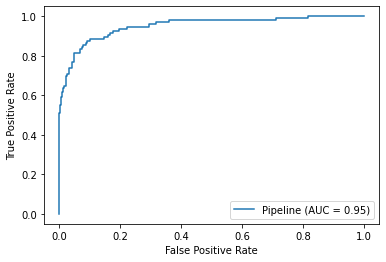

In [78]:
plot_roc_curve(gs_rf.best_estimator_, X_test, y_test)
plt.show()

Ve srovnání s ROC křivkou u modelu LR je tato křivka blíže levému hormínu rohu, což značí, že model RF má lepší predikční
schopnosti než model LR, a to z hlediska vztahu TP a FP poměru.

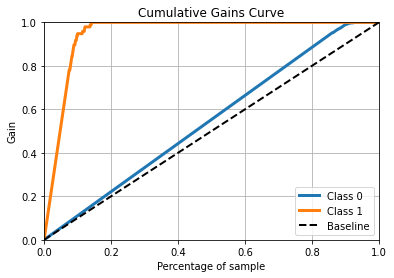

In [90]:
skplt.metrics.plot_cumulative_gain(y_test, y_proba_rf)
plt.show()

Z grafu lze vyčíst, že pokud vezmeme 20 procent případů, kterým model predikoval nejvyšší pravděpodobnost úspěchu, tak
v tého množině se nachází 100 procent všech pozitivních případů.

Vizualizace prvního stromu modelu RF. Celkový počet stromů v modelu je 100:

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Income',
                                                                          'CCAvg',
                                                                          'Mortgage'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=1))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 3, 6, 9]},
             scoring='accuracy')


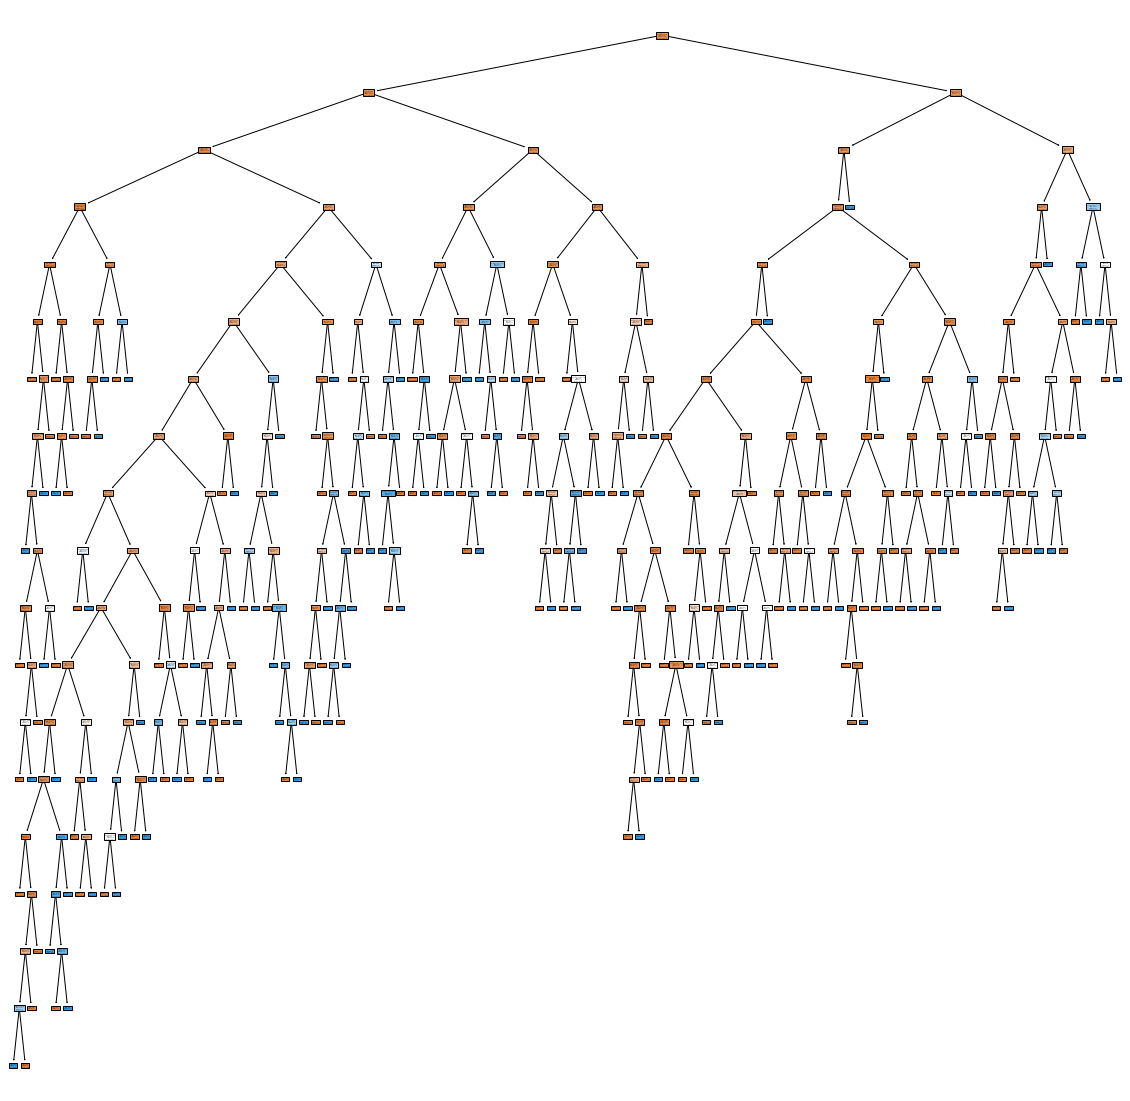

In [89]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(gs_rf.best_estimator_.named_steps['classifier'].estimators_[0],
                   feature_names=X_train.columns, filled=True)
plt.show()